In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
combined = pd.read_csv('datasets/combined.csv')
combined.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,1,445412.0,709.0,1167493.0,5214.74,17.2,6.0,228190.0,416746.0,Short Term,8 years,Home Mortgage,Home Improvements,>= 1,>= 1,0
1,1,347666.0,721.0,806949.0,8741.90,12.0,9.0,256329.0,386958.0,Long Term,3 years,Own Home,Debt Consolidation,0,0,0
2,1,217646.0,730.0,1184194.0,10855.08,19.6,13.0,122170.0,272052.0,Short Term,< 1 year,Home Mortgage,Debt Consolidation,>= 1,>= 1,0
3,1,548746.0,678.0,2559110.0,18660.28,22.6,4.0,437171.0,555038.0,Short Term,2 years,Rent,Debt Consolidation,0,0,0
4,1,215952.0,739.0,1454735.0,39277.75,13.9,20.0,669560.0,1021460.0,Short Term,< 1 year,Rent,Debt Consolidation,0,0,0


### Random Forest Classifier

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

response = pd.read_csv("datasets/combined.csv",usecols = ['Loan Status'])
num = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit']
cate = ['Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Number of Credit Problems', 'Bankruptcies', 'Tax Liens']
ohe = OneHotEncoder(sparse=False)
ohe_data = ohe.fit_transform(combined[cate])
feature_names = ohe.get_feature_names_out(cate)
ohe_df = pd.DataFrame(ohe_data, columns=feature_names)
predics = pd.concat([combined[num], ohe_df], axis=1)

train_predics,test_predics,train_response,test_response = train_test_split(predics,response,test_size = 0.25, random_state = 42)

# import random forest and fit the data 
rf = RandomForestClassifier(random_state=42,n_jobs=-1, bootstrap=False)
rf.fit(train_predics,train_response)

# use the current model and the test set of predictors to predict the response 
response_pred = rf.predict(test_predics)

accuracy = accuracy_score(test_response, response_pred)
f1 = f1_score(test_response, response_pred, average='weighted')  # Use 'weighted' for multi-class problems
precision = precision_score(test_response, response_pred, average='weighted')  # Use 'weighted' for multi-class problems
recall = recall_score(test_response, response_pred, average='weighted')  # Use 'weighted' for multi-class problems

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy:  0.7647250244061178
Accuracy: 0.7647250244061178
F1 Score: 0.6903086624916304
Precision: 0.6959667625125308
Recall: 0.7647250244061178


In [4]:
# Get the feature importances
importances = rf.feature_importances_

# Get the feature names
feature_names = train_predics.columns

# Create a list of tuples with (importance, feature name)
importance_features = sorted([(importance, feature) for feature, importance in zip(feature_names, importances)], key=lambda x: x[0], reverse=True)

# Print the feature rankings
for i, (importance, feature) in enumerate(importance_features):
    print(f"{i+1}. {feature} ({importance:.4f})")

1. Annual Income (0.1166)
2. Current Loan Amount (0.1098)
3. Monthly Debt (0.1096)
4. Current Credit Balance (0.1070)
5. Maximum Open Credit (0.1068)
6. Credit Score (0.1050)
7. Years of Credit History (0.1023)
8. Number of Open Accounts (0.0751)
9. Years in current job_10+ years (0.0121)
10. Purpose_Debt Consolidation (0.0093)
11. Years in current job_2 years (0.0083)
12. Term_Long Term (0.0080)
13. Years in current job_3 years (0.0078)
14. Years in current job_< 1 year (0.0076)
15. Years in current job_5 years (0.0074)
16. Years in current job_1 year (0.0071)
17. Years in current job_4 years (0.0069)
18. Years in current job_6 years (0.0069)
19. Purpose_Other (0.0069)
20. Years in current job_7 years (0.0063)
21. Home Ownership_Rent (0.0063)
22. Term_Short Term (0.0062)
23. Years in current job_8 years (0.0061)
24. Home Ownership_Home Mortgage (0.0060)
25. Years in current job_9 years (0.0054)
26. Home Ownership_Own Home (0.0049)
27. Purpose_Home Improvements (0.0049)
28. Number of C

### Hyperparameter tuning using Randomized Search
Optimizing parameters to improve machine learning accuracy.

In [5]:
from sklearn.model_selection import RandomizedSearchCV

# do Hyperparameter tuning using randomized search

params = {'max_depth': [2,3,5,10,15,20],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV over random forest model for the defined parameters
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

# Random search selects random combinations of hyperparameters to train the model
# shorter time to compute but may not find as accurate of a result as grid search
random_search.fit(train_predics,train_response)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/marcusyeo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(bootstrap=False, n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [10, 25, 30]},
                   scoring='accuracy', verbose=1)

In [6]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=10,
                       n_estimators=25, n_jobs=-1, random_state=42)


In [14]:
# print the best score of model that uses randomized search
# generally a higher accuracy can be achieved after tuning 
print("Accuracy:",random_search.best_score_)

Accuracy: 0.768168998806812


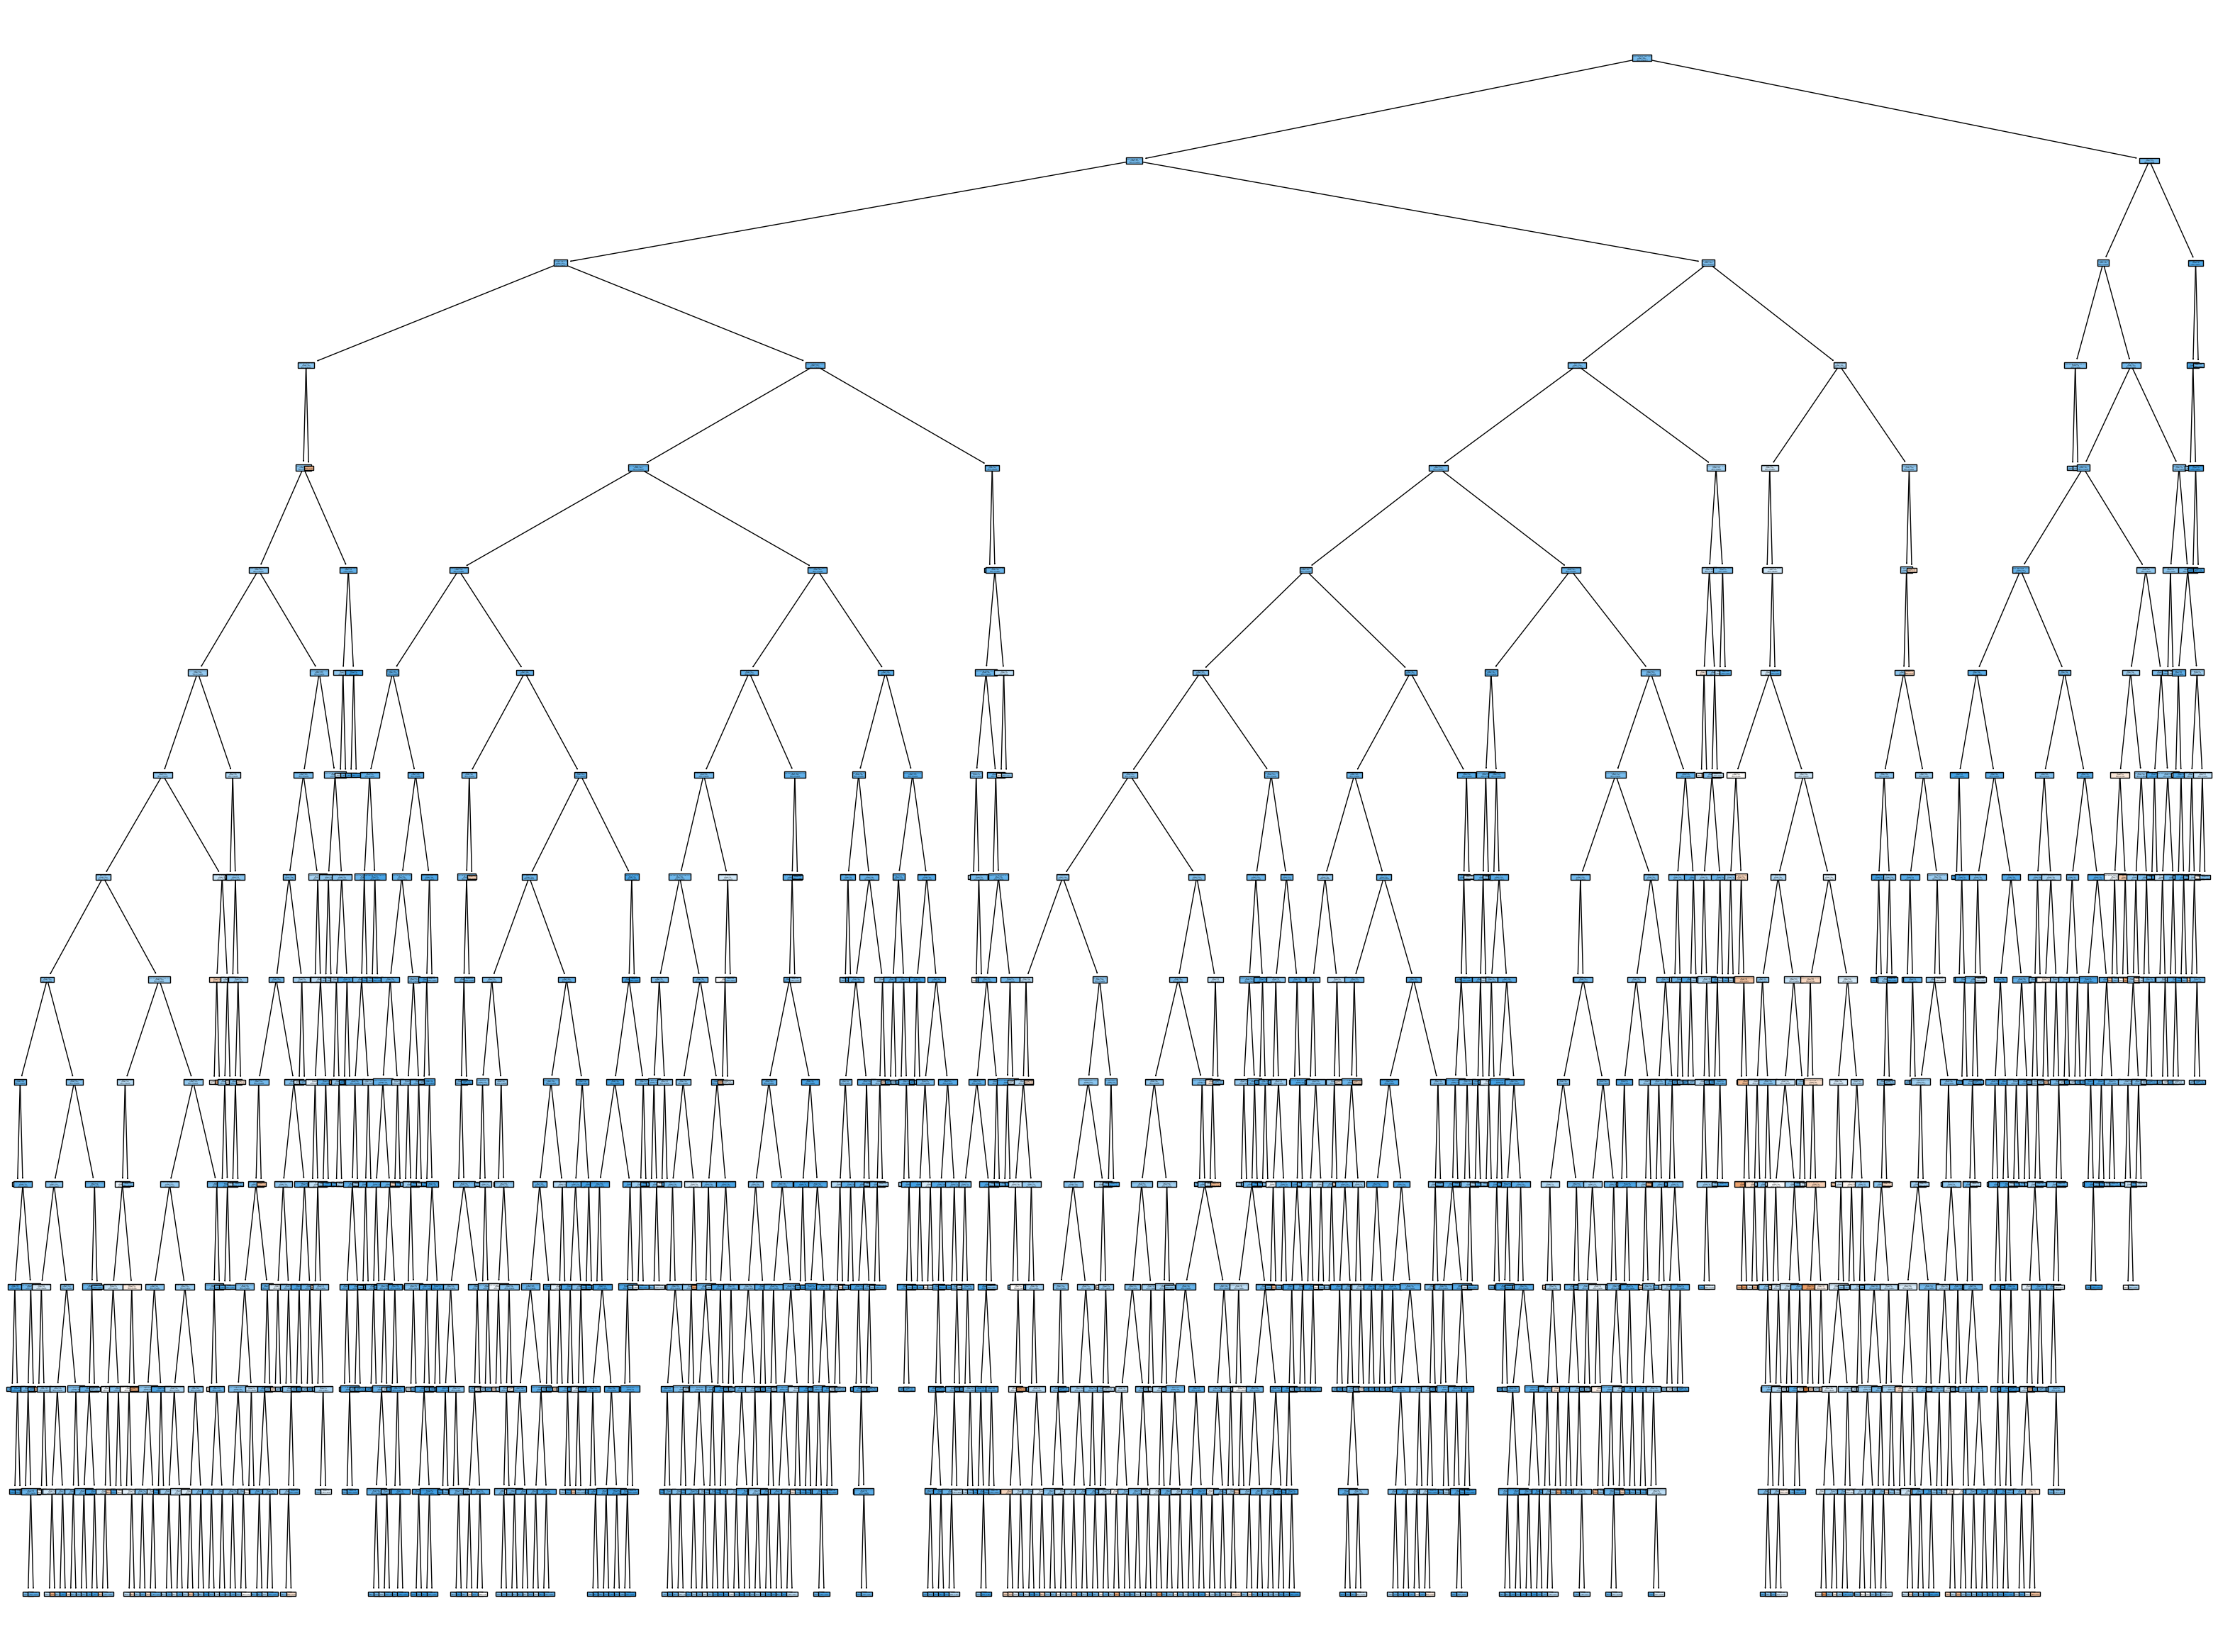

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# Convert feature names to a list
feature_names = list(predics.columns)  # Or use predics.columns.tolist()

plot_tree(randomized_best.estimators_[2],
          feature_names=feature_names,
          class_names=['Fully Paid', 'Charged Off'],
          filled=True)

plt.show()  # Display the plot

In [9]:
importances = randomized_best.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Ranking of variables that determine the loan status:")
for f in range(train_predics.shape[1]):
    print(f"{f+1}. {train_predics.columns[indices[f]]} ({importances[indices[f]]:.4f})")

Ranking of variables that determine the loan status:
1. Credit Score (0.1800)
2. Annual Income (0.1335)
3. Current Loan Amount (0.0939)
4. Monthly Debt (0.0939)
5. Maximum Open Credit (0.0842)
6. Current Credit Balance (0.0762)
7. Years of Credit History (0.0717)
8. Term_Long Term (0.0529)
9. Term_Short Term (0.0481)
10. Number of Open Accounts (0.0474)
11. Home Ownership_Rent (0.0160)
12. Home Ownership_Home Mortgage (0.0149)
13. Years in current job_10+ years (0.0076)
14. Purpose_Debt Consolidation (0.0074)
15. Years in current job_2 years (0.0043)
16. Years in current job_< 1 year (0.0040)
17. Purpose_Other (0.0040)
18. Purpose_Business Loan (0.0038)
19. Years in current job_3 years (0.0038)
20. Years in current job_4 years (0.0037)
21. Number of Credit Problems_>= 1 (0.0036)
22. Bankruptcies_>= 1 (0.0036)
23. Home Ownership_Own Home (0.0035)
24. Years in current job_5 years (0.0035)
25. Number of Credit Problems_0 (0.0035)
26. Years in current job_6 years (0.0034)
27. Purpose_Small